## Customer Churn Prediction_SHAP Explainability
Model: Logistic Regression (Class-Weighted)

In [19]:
# 11.1 Load Required Artifacts (Model + Data)
import pandas as pd
import joblib
import shap
import numpy as np

In [20]:
# Load trained model
model = joblib.load("../models/best_churn_model.pkl")

# Load scaled test data (this already has correct column names)
X_test_scaled = pd.read_csv("../data/processed/X_test_scaled.csv")

In [21]:
# 11.2 — Reconstruct Feature Names
feature_names = X_test_scaled.columns.tolist()

In [22]:
# Mandatory sanity check
print(len(feature_names))
print(X_test_scaled.shape)


21
(2000, 21)


In [33]:
# 11.3 — Prepare DataFrame for SHAP (CRITICAL FIX)
X_test_scaled_df = X_test_scaled.copy()
X_test_scaled_df = X_test_scaled_df.astype(float)

# Verification (MANDATORY)
print(type(X_test_scaled_df))
print(X_test_scaled_df.shape)
print(X_test_scaled_df.dtypes.unique())

<class 'pandas.core.frame.DataFrame'>
(2000, 21)
[dtype('float64')]


In [34]:
# 11.4 — Initialize SHAP Explainer (Linear Model)
shap.initjs()

explainer = shap.LinearExplainer(
    model,
    X_test_scaled_df
)

In [35]:
# 11.5 — Compute SHAP Values
shap_values = explainer.shap_values(X_test_scaled_df)

In [36]:
# SHAP check
np.array(shap_values).shape

(2000, 21)

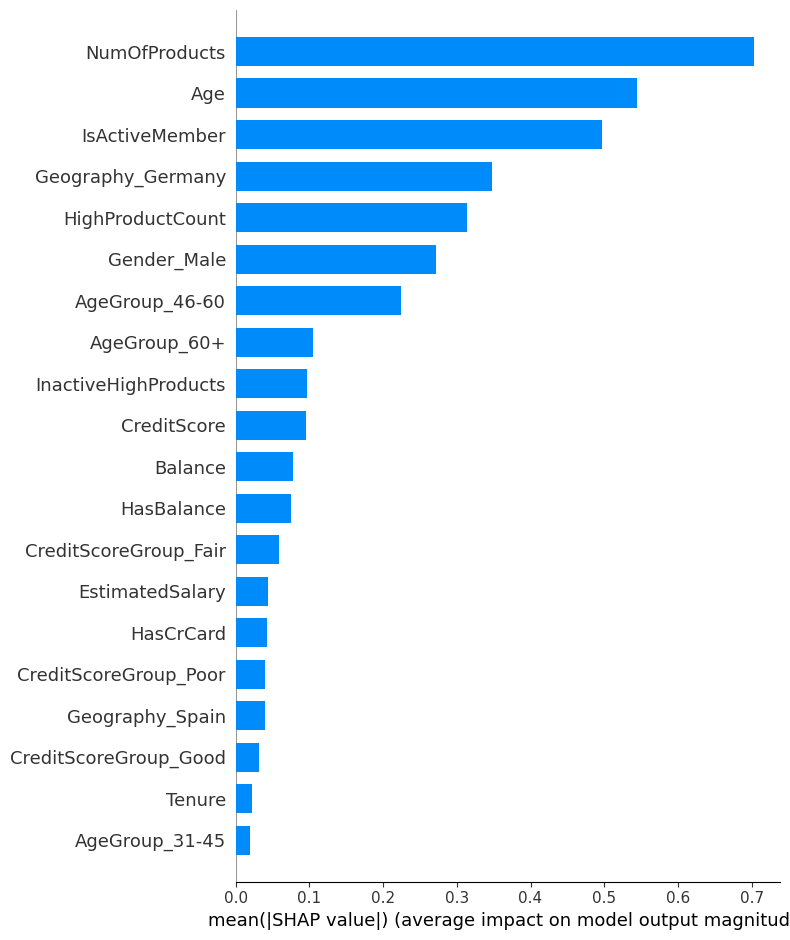

In [30]:
# 11.6 — Global Feature Importance (BAR)
shap.summary_plot(
    shap_values,
    X_test_scaled_df,
    plot_type="bar",
    show=True
)


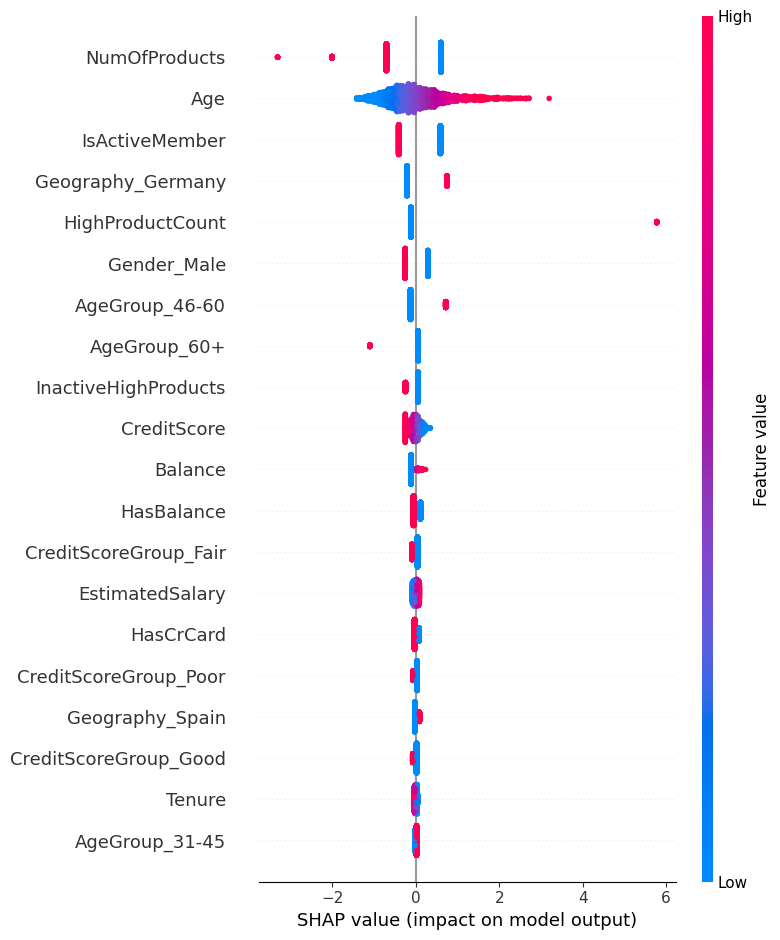

In [37]:
# 11.7 — Directional Impact (Beeswarm)
shap.summary_plot(
    shap_values,
    X_test_scaled_df,
    show=True
)

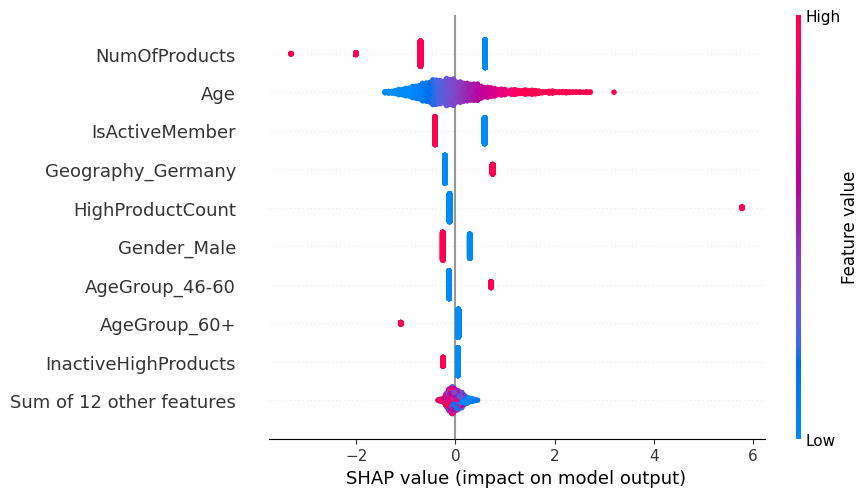

In [38]:
# 11.8 — Modern SHAP API (Stable)
shap_explanation = shap.Explanation(
    values=shap_values,
    data=X_test_scaled_df,
    feature_names=feature_names
)

shap.plots.beeswarm(shap_explanation)

In [48]:
# 11.9 — Create output directory
import os

os.makedirs("../visuals/figures", exist_ok=True)

In [49]:
# 11.10 — Save Global Feature Importance (BAR)
import matplotlib.pyplot as plt

shap.summary_plot(
    shap_values,
    X_test_scaled_df,
    plot_type="bar",
    show=False
)

plt.tight_layout()
plt.savefig(
    "../visuals/figures/shap_global_importance_bar.png",
    dpi=300,
    bbox_inches="tight"
)
plt.close()


In [50]:
# 11.11 — Save Directional Impact (Beeswarm)
shap.summary_plot(
    shap_values,
    X_test_scaled_df,
    show=False
)

plt.tight_layout()
plt.savefig(
    "../visuals/figures/shap_beeswarm.png",
    dpi=300,
    bbox_inches="tight"
)
plt.close()


In [51]:
# 11.12 — Save Top-10 SHAP features only
shap.summary_plot(
    shap_values,
    X_test_scaled_df,
    max_display=10,
    show=False
)

plt.savefig(
    "../visuals/figures/shap_top10_features.png",
    dpi=300,
    bbox_inches="tight"
)
plt.close()


In [52]:
# Verification checklist
import os

os.listdir("../visuals/figures")


['shap_beeswarm.png',
 'shap_global_importance_bar.png',
 'shap_top10_features.png']